In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('C:/Users/Myself/OneDrive/Desktop/Automobile_data.csv')

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
cols = ['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
df.columns = cols
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [6]:
df.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [7]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

symboling : [ 3  1  2  0 -1 -2]
normalized_losses : ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
make : ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel_type : ['gas' 'diesel']
aspiration : ['std' 'turbo']
num_of_doors : ['two' 'four' '?']
body_style : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive_wheels : ['rwd' 'fwd' '4wd']
engine_location : ['front' 'rear']
wheel_base : [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  9

In [8]:
for col in df.columns:
    df[col].replace({'?':np.nan},inplace=True)
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [9]:
df.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

We can observe that now there are missing values in some columns.

# Visualizing the missing values

<AxesSubplot:>

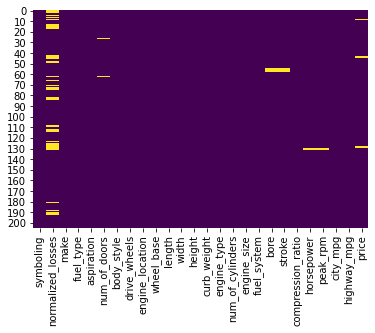

In [10]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

# Replacing the missing values

In [11]:
num_col = ['normalized_losses', 'bore',  'stroke', 'horsepower', 'peak_rpm','price']
for col in num_col:
    df[col]=pd.to_numeric(df[col])
    df[col].fillna(df[col].mean(), inplace=True)
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


<AxesSubplot:>

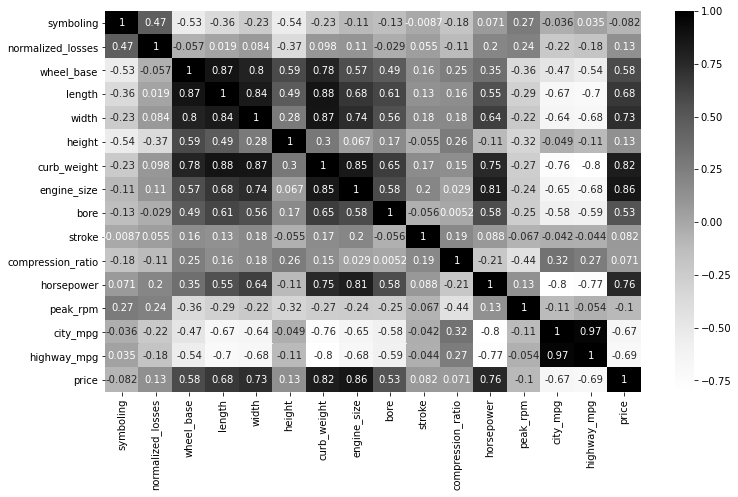

In [12]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Greys')


Text(0, 0.5, 'Price')

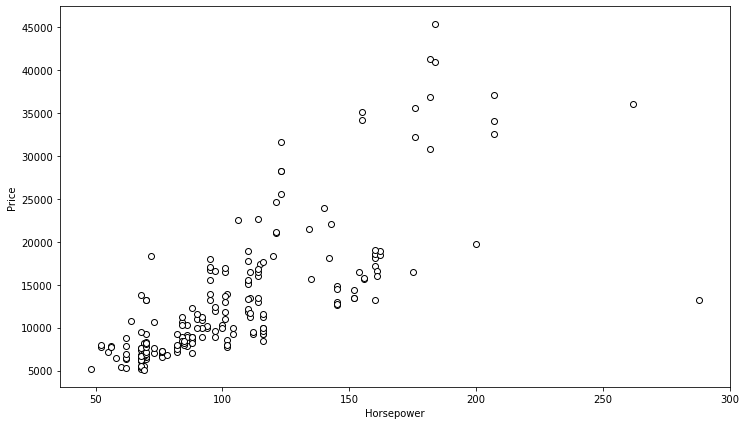

In [13]:
plt.figure(figsize=(12,7))
plt.scatter(x='horsepower',y='price',data=df,color='w',edgecolor='k',linewidths=1)
plt.xlabel('Horsepower')
plt.ylabel('Price')

<AxesSubplot:xlabel='horsepower', ylabel='Count'>

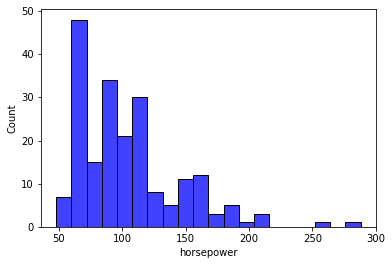

In [14]:
sns.histplot(df.horsepower,bins=20,color='blue')

Text(0, 0.5, 'Price')

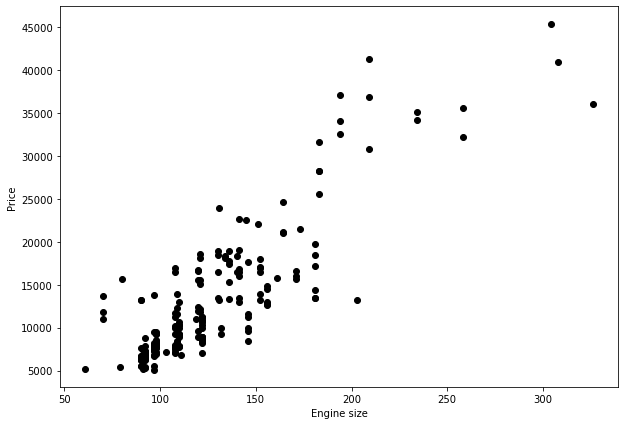

In [15]:
plt.figure(figsize=(10,7))
plt.scatter(x='engine_size',y='price',data=df,color='k')
plt.xlabel('Engine size')
plt.ylabel('Price')

<AxesSubplot:xlabel='engine_size', ylabel='Count'>

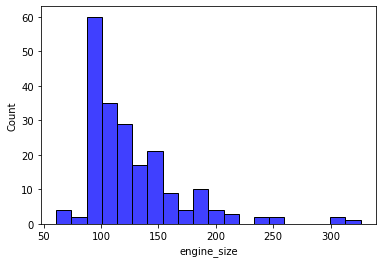

In [16]:
sns.histplot(df.engine_size,bins=20,color='blue')

Text(0, 0.5, 'Price')

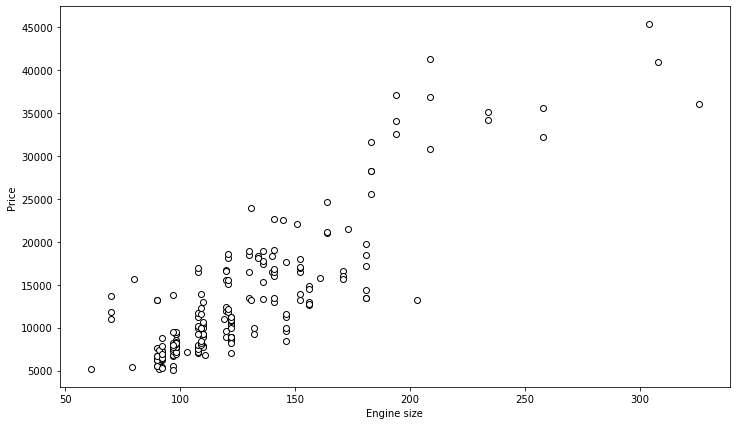

In [17]:
plt.figure(figsize=(12,7))
plt.scatter(x='engine_size',y='price',data=df,color='w',edgecolors='k',linewidths=1)
plt.xlabel('Engine size')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

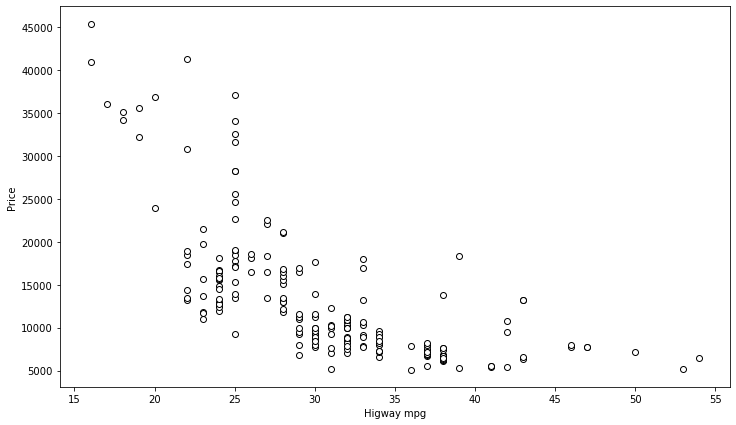

In [18]:
plt.figure(figsize=(12,7))
plt.scatter(x='highway_mpg',y='price',data=df,color='w',edgecolors='k',linewidths=1)
plt.xlabel('Higway mpg')
plt.ylabel('Price')

We can see price decreases with an increase in higway_mpg.

In [19]:
df.num_of_doors.value_counts()

four    114
two      89
Name: num_of_doors, dtype: int64

<AxesSubplot:xlabel='price', ylabel='num_of_doors'>

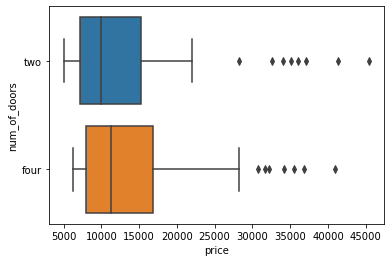

In [20]:
sns.boxplot(x='price',y='num_of_doors',data=df)

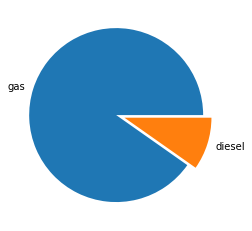

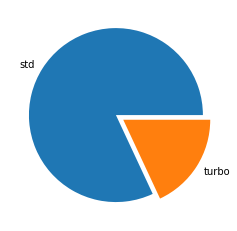

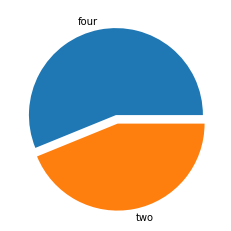

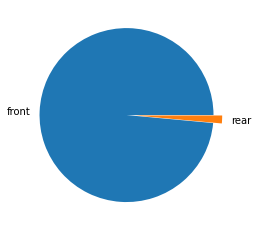

In [21]:
def pie_chart(cols):
    for col in cols:
        fig, ax = plt.subplots(figsize=(6,4))
        plt.pie(x=df[col].value_counts(), labels=list(df[col].value_counts().index), explode = (0, 0.1))
        plt.show()
pie_chart(['fuel_type', 'aspiration', 'num_of_doors', 'engine_location'])

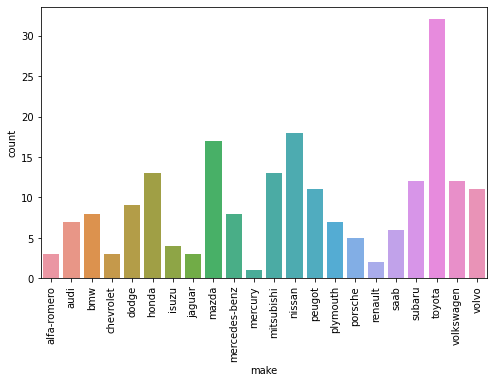

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(df.make)
plt.xticks(rotation=90)
plt.show()

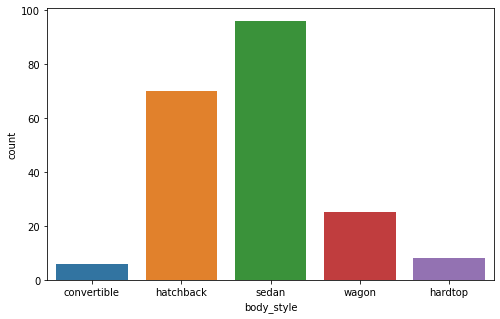

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(df['body_style'])
plt.show()

# Data Preprocessing

In [24]:
df.isnull().sum().sum()

2

In [25]:
nulls=df.isnull().sum()
print(nulls[nulls > 0])

num_of_doors    2
dtype: int64


In [26]:
null_col_names=nulls[nulls>0].index
for col in null_col_names:
    print(col, df[col].dtypes)

num_of_doors object


In [27]:
df['num_of_doors']=df['num_of_doors'].fillna(df['num_of_doors'].value_counts().sort_values(ascending=False).index[0])

In [28]:
df.isnull().sum().sum()

0

# Outlier Analysis

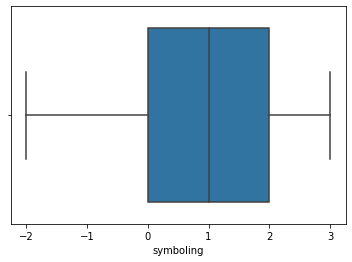

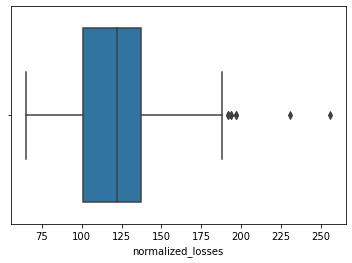

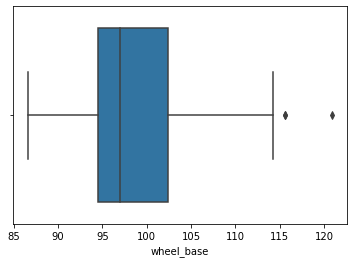

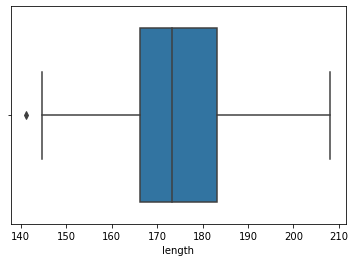

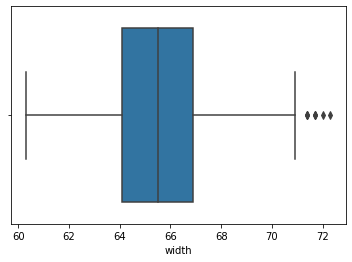

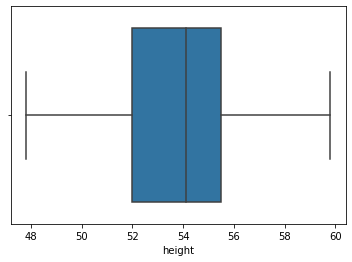

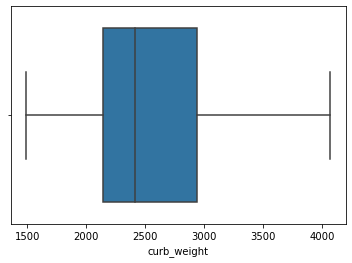

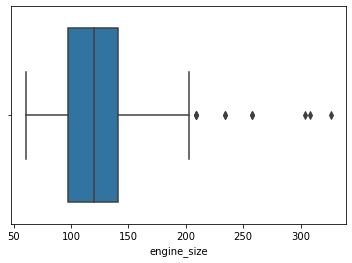

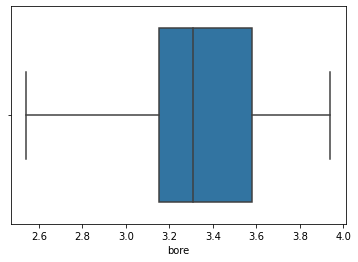

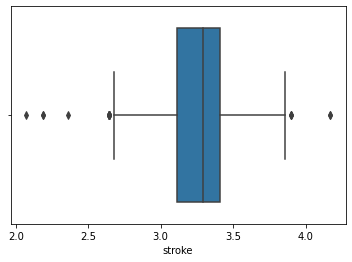

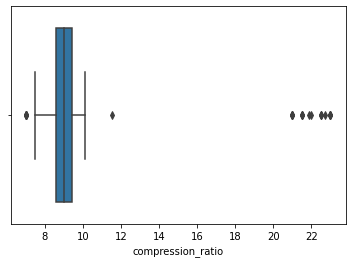

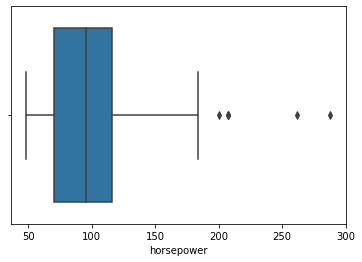

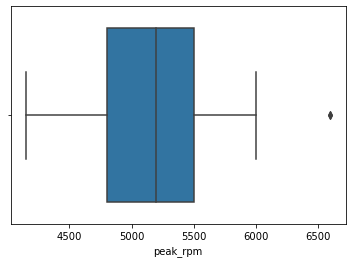

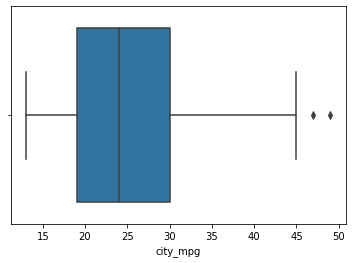

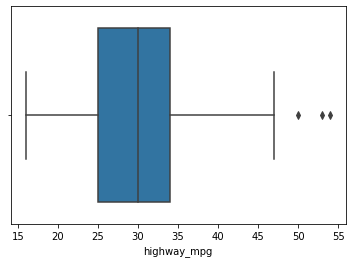

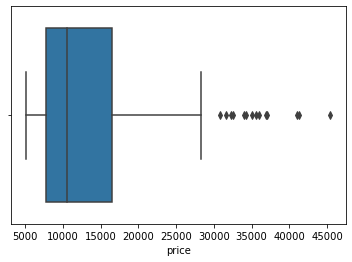

In [29]:
for col in df._get_numeric_data():
    sns.boxplot(df[col])
    plt.show()

In [30]:
def thresholds(dataframe, cols, q1=0.25, q3=0.75):
    for col_name in cols:
        quartile1 = dataframe[col_name].quantile(q1)
        quartile3 = dataframe[col_name].quantile(q3)
        IQR = quartile3 - quartile1
        up_limit = quartile3 + 1.5 * IQR
        low_limit = quartile1 - 1.5 * IQR
        dataframe.loc[(dataframe[col_name] < low_limit), col_name] = low_limit
        dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit
    return dataframe

In [31]:
df=thresholds(df, ['normalized_losses', 'wheel_base', 'length', 'width', 'engine_size', 'stroke', 
                   'compression_ratio', 'horsepower', 'highway_mpg', 'price'])

In [32]:
df=df.query("`city_mpg`<45")

In [33]:
df=df.query("`highway_mpg`<48")

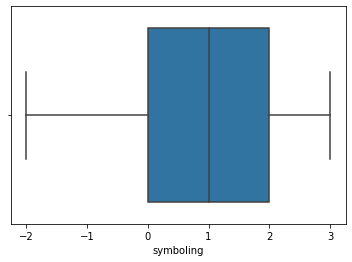

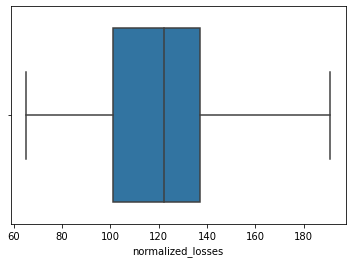

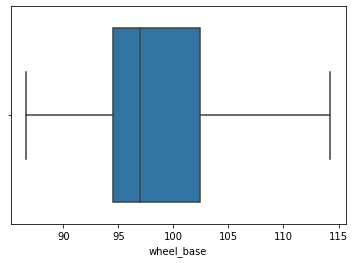

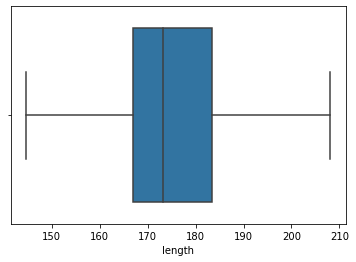

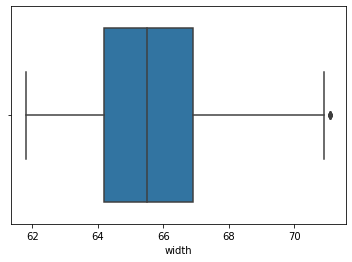

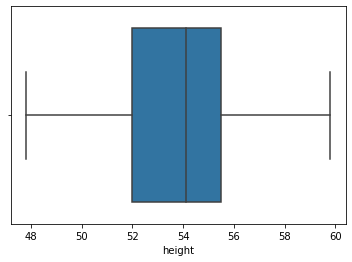

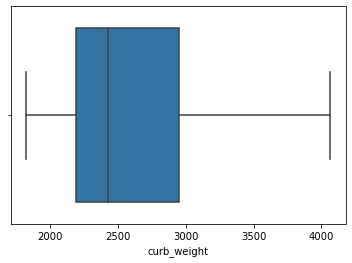

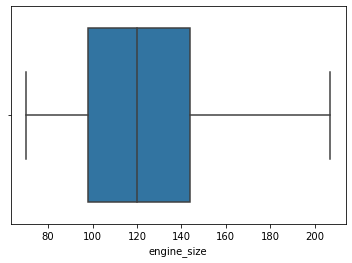

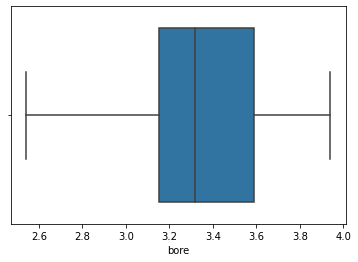

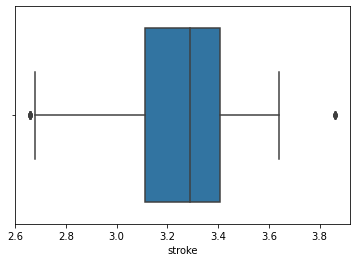

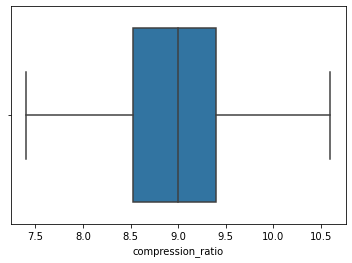

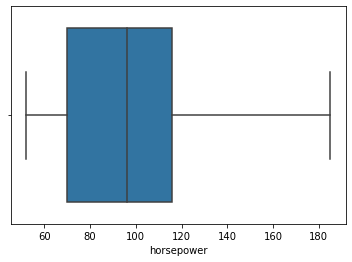

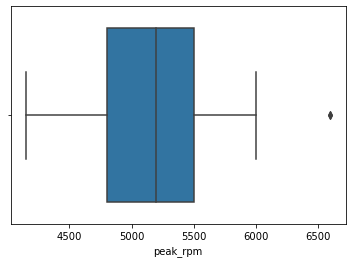

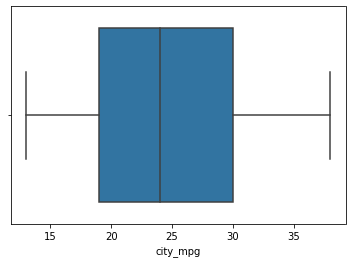

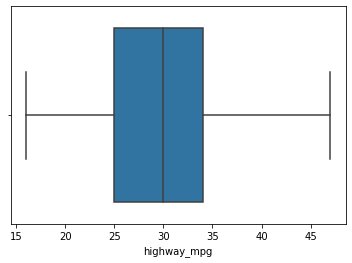

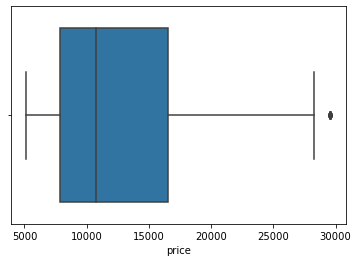

In [34]:
for col in df._get_numeric_data():
    sns.boxplot(df[col])
    plt.show()

# Building Model

In [47]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import LabelEncoder

In [48]:
for i in categorical:
    label=LabelEncoder()
    df[i]=label.fit_transform(df[i])

In [49]:
X=df.drop('price', axis=1)
Y=df[['price']]

In [50]:
categorical=df.select_dtypes(include=object)
categorical.columns

Index([], dtype='object')

In [46]:
df

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,0,1,0,1,0,2,0,88.6,...,130.0,5,3.47,2.68,9.0,111.0,5000.0,21,27.0,13495.0
1,3,122.0,0,1,0,1,0,2,0,88.6,...,130.0,5,3.47,2.68,9.0,111.0,5000.0,21,27.0,16500.0
2,1,122.0,0,1,0,1,2,2,0,94.5,...,152.0,5,2.68,3.47,9.0,154.0,5000.0,19,26.0,16500.0
3,2,164.0,1,1,0,0,3,1,0,99.8,...,109.0,5,3.19,3.40,10.0,102.0,5500.0,24,30.0,13950.0
4,2,164.0,1,1,0,0,3,0,0,99.4,...,136.0,5,3.19,3.40,8.0,115.0,5500.0,18,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,21,1,0,0,3,2,0,109.1,...,141.0,5,3.78,3.15,9.5,114.0,5400.0,23,28.0,16845.0
201,-1,95.0,21,1,1,0,3,2,0,109.1,...,141.0,5,3.78,3.15,8.7,160.0,5300.0,19,25.0,19045.0
202,-1,95.0,21,1,0,0,3,2,0,109.1,...,173.0,5,3.58,2.87,8.8,134.0,5500.0,18,23.0,21485.0
203,-1,95.0,21,0,1,0,3,2,0,109.1,...,145.0,3,3.01,3.40,10.6,106.0,4800.0,26,27.0,22470.0


In [51]:
X

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,3,122.0,0,1,0,1,0,2,0,88.6,...,2,130.0,5,3.47,2.68,9.0,111.0,5000.0,21,27.0
1,3,122.0,0,1,0,1,0,2,0,88.6,...,2,130.0,5,3.47,2.68,9.0,111.0,5000.0,21,27.0
2,1,122.0,0,1,0,1,2,2,0,94.5,...,3,152.0,5,2.68,3.47,9.0,154.0,5000.0,19,26.0
3,2,164.0,1,1,0,0,3,1,0,99.8,...,2,109.0,5,3.19,3.40,10.0,102.0,5500.0,24,30.0
4,2,164.0,1,1,0,0,3,0,0,99.4,...,1,136.0,5,3.19,3.40,8.0,115.0,5500.0,18,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,21,1,0,0,3,2,0,109.1,...,2,141.0,5,3.78,3.15,9.5,114.0,5400.0,23,28.0
201,-1,95.0,21,1,1,0,3,2,0,109.1,...,2,141.0,5,3.78,3.15,8.7,160.0,5300.0,19,25.0
202,-1,95.0,21,1,0,0,3,2,0,109.1,...,3,173.0,5,3.58,2.87,8.8,134.0,5500.0,18,23.0
203,-1,95.0,21,0,1,0,3,2,0,109.1,...,3,145.0,3,3.01,3.40,10.6,106.0,4800.0,26,27.0


In [52]:
models=[LinearRegression(), Lasso(), Ridge(), KNeighborsRegressor(), DecisionTreeRegressor()]

In [53]:
def reg_models(x, y, models):
    for model in models:
        X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.25, random_state=50)
        model.fit(X_train,Y_train)
        Y_test_pred=model.predict(X_test)
        print(model)
        print('Mean Squared Error: {}'.format(mean_squared_error(Y_test, Y_test_pred)))
        print('Regression Score(r2): {}'.format(r2_score(Y_test, Y_test_pred)))
        print('')

In [85]:
X

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,3,122.0,0,1,0,1,0,2,0,88.6,...,2,130.0,5,3.47,2.68,9.0,111.0,5000.0,21,27.0
1,3,122.0,0,1,0,1,0,2,0,88.6,...,2,130.0,5,3.47,2.68,9.0,111.0,5000.0,21,27.0
2,1,122.0,0,1,0,1,2,2,0,94.5,...,3,152.0,5,2.68,3.47,9.0,154.0,5000.0,19,26.0
3,2,164.0,1,1,0,0,3,1,0,99.8,...,2,109.0,5,3.19,3.40,10.0,102.0,5500.0,24,30.0
4,2,164.0,1,1,0,0,3,0,0,99.4,...,1,136.0,5,3.19,3.40,8.0,115.0,5500.0,18,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,21,1,0,0,3,2,0,109.1,...,2,141.0,5,3.78,3.15,9.5,114.0,5400.0,23,28.0
201,-1,95.0,21,1,1,0,3,2,0,109.1,...,2,141.0,5,3.78,3.15,8.7,160.0,5300.0,19,25.0
202,-1,95.0,21,1,0,0,3,2,0,109.1,...,3,173.0,5,3.58,2.87,8.8,134.0,5500.0,18,23.0
203,-1,95.0,21,0,1,0,3,2,0,109.1,...,3,145.0,3,3.01,3.40,10.6,106.0,4800.0,26,27.0


In [43]:
Y

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [54]:
reg_models(X,Y,models)

LinearRegression()
Mean Squared Error: 6720426.124009921
Regression Score(r2): 0.8353136270742131

Lasso()
Mean Squared Error: 6703268.983970725
Regression Score(r2): 0.8357340687412587

Ridge()
Mean Squared Error: 7299536.498508337
Regression Score(r2): 0.8211223265019018

KNeighborsRegressor()
Mean Squared Error: 10926636.579642244
Regression Score(r2): 0.7322389810743419

DecisionTreeRegressor()
Mean Squared Error: 7594344.509803922
Regression Score(r2): 0.8138979539407217



# HyperParameter Tuning

In [65]:
model_parameters={
    'Linear Regression':{
        'model': LinearRegression(),
        'params': {'fit_intercept': [True , False],
                   'normalize': [True, False], 
                    }},
    'Lasso Regression': {
        'model': Lasso(),
        'params': {'selection': ['cyclic', 'random'], 
                  'alpha': [0.1,0.01, 0.005, 0.05, 0.001 ,0.2, 0.3, 0.5, 0.8, 0.9, 1]}},
    'Ridge Regression' : {
        'model': Ridge(),
        'params': {'alpha': [0.1, 0.01, 0.005, 0.05, 0.001 ,0.2, 0.3, 0.5, 0.8, 0.9, 1], 
                   'solver': ['auto', 'svd', 'cholesky']}},
    'KNeighborsRegeressor': {
        'model': KNeighborsRegressor(), 
        'params': {'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
                  'weights': ['uniform', 'distance'],
                  'n_neighbors': [3, 4, 5]}},
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(),
        'params': {'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                   'splitter': ['best', 'random']}}, 
}

In [97]:
def tuning(X, Y, model_params):
    results=[]
    for model_name, mp in model_params.items():
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=50)
        clf=GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=True)
        clf.fit(X_train, Y_train)
        Y_test_pred=clf.predict(X_test)
        test_error=mean_squared_error(Y_test, Y_test_pred)
        r2score=r2_score(Y_test, Y_test_pred)                                                  
        print(model_name)
        print('Mean Squared Error: {}'.format(test_error))
        print('Regression Score(r2): {}'.format(r2score))
        print('------------------------------------------------------')
        results.append({'model': model_name, 
                        'MSE': test_error,
                        'R2 Score': r2score,
                        'best_score': clf.best_score_,
                        'best_params': clf.best_params_})
    return results

In [98]:
result = tuning(X, Y, model_parameters)

Linear Regression
Mean Squared Error: 6720426.12400991
Regression Score(r2): 0.8353136270742134
------------------------------------------------------
Lasso Regression
Mean Squared Error: 6703090.080805104
Regression Score(r2): 0.8357384528253787
------------------------------------------------------
Ridge Regression
Mean Squared Error: 7299536.498508337
Regression Score(r2): 0.8211223265019018
------------------------------------------------------
KNeighborsRegeressor
Mean Squared Error: 6534700.786582126
Regression Score(r2): 0.839864890880555
------------------------------------------------------
DecisionTreeRegressor
Mean Squared Error: 6809293.26098558
Regression Score(r2): 0.8331359070620052
------------------------------------------------------


In [99]:
res = pd.DataFrame(result)

In [100]:
res_sorted=res.sort_values('R2 Score', ascending = True)
res_sorted

,model,MSE,R2 Score,best_score,best_params
2,Ridge Regression,7.299536e+06,0.821122,0.766560,"{'alpha': 1, 'solver': 'auto'}"
4,DecisionTreeRegressor,6.809293e+06,0.833136,0.797217,"{'criterion': 'poisson', 'splitter': 'best'}"
0,Linear Regression,6.720426e+06,0.835314,0.765040,"{'fit_intercept': True, 'normalize': True}"
1,Lasso Regression,6.703090e+06,0.835738,0.765313,"{'alpha': 1, 'selection': 'random'}"
3,KNeighborsRegeressor,6.534701e+06,0.839865,0.831178,"{'algorithm': 'auto', 'n_neighbors': 4, 'weigh..."


In [101]:
res_sorted.to_csv('result.csv',index=False)

# Final Model

In [102]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=50)
model=Lasso(alpha=1, selection='cyclic')
model.fit(X_train, Y_train)
Y_test_pred=model.predict(X_test)
test_error=mean_squared_error(Y_test, Y_test_pred)
r2score=r2_score(Y_test, Y_test_pred) 
print('Mean Squared Error: {}'.format(test_error))
print('Regression Score(r2): {}'.format(r2score))

Mean Squared Error: 6703268.983970725
Regression Score(r2): 0.8357340687412587
